###*pandas & numpy help in data handling and computation.*

###*seaborn & matplotlib help in data visualization and insights.*







In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sale=pd.read_csv("/content/train.csv")

###*Use sale.head() to display the first 5 rows of the dataset*

In [ ]:
sale.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


###*sale.tail() shows the last 5 rows of the dataset.*

In [ ]:
sale.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21-05-2017,28-05-2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12-01-2016,17-01-2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12-01-2016,17-01-2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12-01-2016,17-01-2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12-01-2016,17-01-2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


###*sale.shape() shows the number of rows and columns in the dataset*

In [ ]:
sale.shape

(9800, 18)

###*Use drop_duplicates() to remove duplicate rows from the dataset.*

In [ ]:
sale = sale.drop_duplicates()

###*After removing duplicates, the dataset now contains only unique rows, reducing redundancy in the data.*

In [ ]:
sale.shape

(9800, 18)

###*sale.isnull().sum() shows the total number of missing (null) values in each column of the dataset*

In [ ]:
sale.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,8
Customer ID,0
Customer Name,0
Segment,4
Country,0
City,2


###*sale.dtypes shows the data type of each column*

In [ ]:
print(sale.dtypes)

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object


###*sale.select_dtypes(include=["object"]) selects all categorical (object type) columns from the dataset, and using .columns.tolist() converts their names into a list*

In [ ]:
filter_object=sale.select_dtypes(include=["object"]).columns.tolist()
print(filter_object)

['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']


###*Creates a new DataFrame 'object_list' containing only the selected categorical columns from the dataset*

In [ ]:
object_list=sale[['Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']]

###*I will use a for loop to fill the null values in object data types.*

In [ ]:
for i in object_list:
  sale[i]=sale[i].fillna(sale[i].mode()[0])

In [ ]:
sale["Postal Code"]=sale["Postal Code"].fillna(sale["Postal Code"].mean())

###*After filling the missing values, we check again with sale.isnull().sum() to confirm that no null values remain*

In [ ]:
sale.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


###*Convert the 'Order Date' column to datetime format (day comes first),*
###*then extract the year from 'Order Date' and store it in a new column called 'year'*

In [ ]:
sale["Order Date"]=pd.to_datetime(sale["Order Date"],dayfirst=True)
sale["year"]=sale["Order Date"].dt.year

###*Convert the 'Sales' column values to integers*
###*Convert the 'Postal Code' column values to integers*

In [ ]:
sale['Sales']=sale["Sales"].astype(int)
sale['Postal Code']=sale['Postal Code'].astype(int)

###*Check data types of all columns to confirm changes*

In [ ]:
print(sale.dtypes)

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                     int64
year                      int32
dtype: object


###*To filter numeric columns for outlier analysis*

In [ ]:
filter_numeric=sale.select_dtypes(include=["int"]).columns.tolist()
print(filter_numeric)

['Row ID', 'Postal Code', 'Sales', 'year']


In [ ]:
numeric_value=sale[['Row ID', 'Postal Code', 'Sales', 'year']]

###*We are identifying outlier data in the dataset*

Text(0.5, 1.0, 'Box plot')

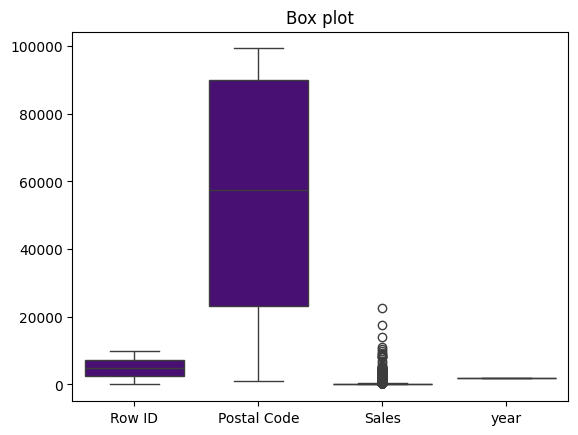

In [ ]:
box=sns.boxplot(numeric_value,color="indigo")
plt.title("Box plot")

###*Use sales['year'].unique() to find the unique values in the 'year' column of the sales dataset*

In [ ]:
sale['year'].unique()

array([2017, 2016, 2015, 2018], dtype=int32)

###*Use sales['Category'].unique() to find the unique values in the 'Category' column of the sales dataset*

---




In [ ]:
sale['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

###*Use sales['Product Name'].unique() to find the unique values in the 'Product Name' column of the sales dataset*

In [ ]:
sale['Product Name'].unique()

array(['Bush Somerset Collection Bookcase',
       'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back',
       'Self-Adhesive Address Labels for Typewriters by Universal', ...,
       'Cisco 8961 IP Phone Charcoal', 'Eureka Hand Vacuum, Bagless',
       'LG G2'], dtype=object)

###- *Data increases each year from 2015 to 2018*
###- *2018 has the highest count—shows strong growth*
###- *2015 and 2016 have similar numbers—steady start*
###- *Small typo in x-axis label ("Yers" should be "Years")*


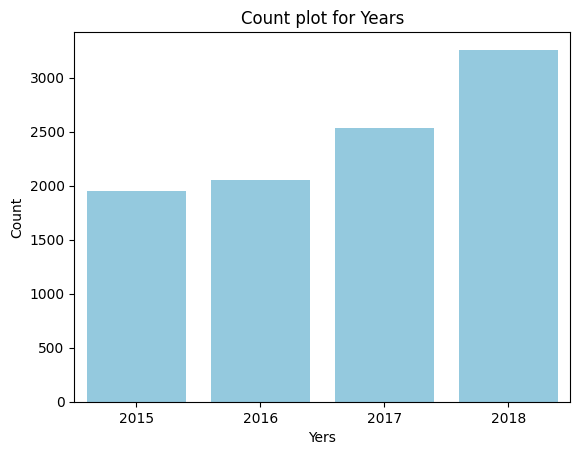

In [ ]:
sns.countplot(x='year',data=sale,color="skyblue")
plt.title("Count plot for Years")
plt.xlabel("Yers")
plt.ylabel("Count")
plt.show()

###-*Office Supplies take up the biggest portion—over 60% of the total.*
###-*Furniture makes up about 21%, showing it's a smaller but still important category.*
###-*Technology is the smallest slice at 18.5%, but still a key part of the mix.*

Text(0.5, 1.0, 'Pie Chart')

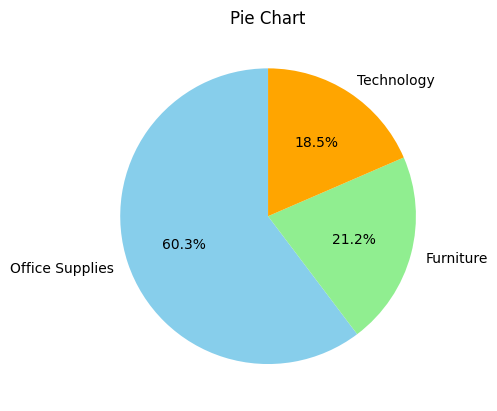

In [ ]:
cat_counts = sale['Category'].value_counts()
plt.pie(cat_counts,labels=cat_counts.index,autopct="%1.1f%%",startangle=90,colors=["skyblue","lightgreen","orange"])
plt.title("Pie Chart")

###- *Standard Class is the most popular shipping method, used around 6000 times.*
###-*Second Class is the second most used, with about 2000 shipments.*
###- *First Class has fewer shipments—around 1500.*
###- *Same Day shipping is the least used, with under 500 shipments.*


Text(0.5, 1.0, 'Histogram')

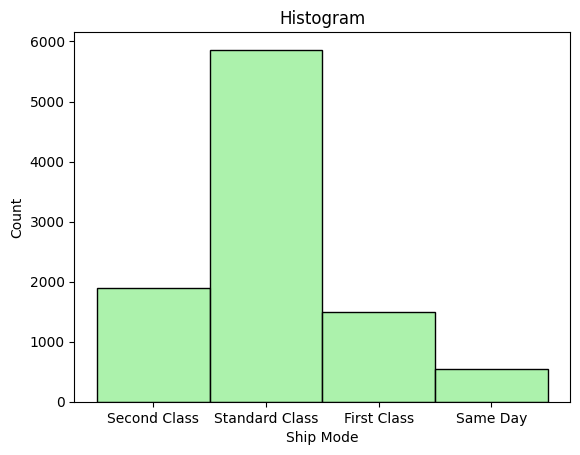

In [ ]:
sns.histplot(x="Ship Mode",data=sale,color="lightgreen")
plt.title("Histogram")

###-*South and West regions have wider shapes, meaning more data is concentrated around certain values—these regions have more consistent patterns.*
###-*East shows a wider spread, suggesting more variation in the data—values are more scattered.*
###-*The median (white dot) is similar across all regions, so the central value doesn’t change much.*
###-*Central region has a tighter shape, meaning less variation—data is more evenly packed.*


Text(0.5, 1.0, 'violinplot')

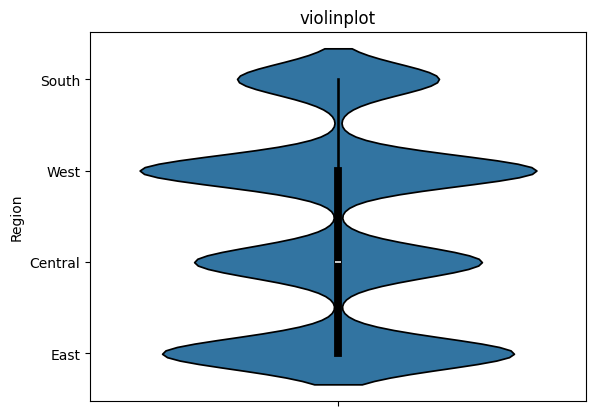

In [ ]:
sns.violinplot(sale["Region"],linecolor="black")
plt.title("violinplot")

###- *Sales stayed fairly steady over the four years—no big jumps or drops.*
###- *2015 and 2017 had slightly higher sales than the other years.*
###- 2016 and 2018 were a bit lower, but not by much.*

Text(0.5, 1.0, 'Barplot')

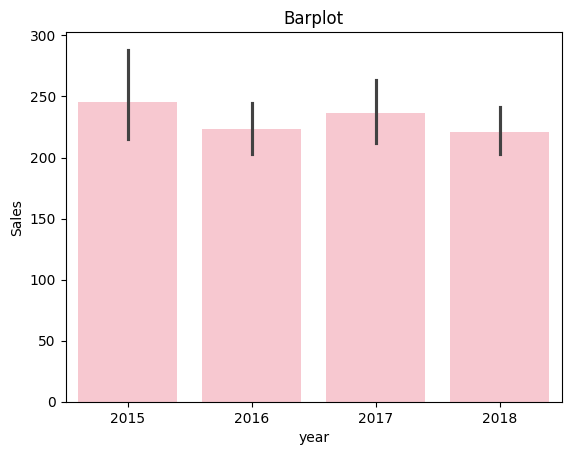

In [ ]:
sns.barplot(x="year",y="Sales",data=sale,color="pink")
plt.title("Barplot")

###- *Sales are lowest for "Standard Class" shipping—even though it's the most used mode (as seen in your earlier chart)*.
###- *Same Day shipping has the highest sales, suggesting customers who choose faster delivery might spend more.*
###- *Second Class starts off with moderate sales, slightly better than Standard Class.*
###- *First Class sales stay steady—not too high, not too low.*

Text(0.5, 1.0, 'lineplot')

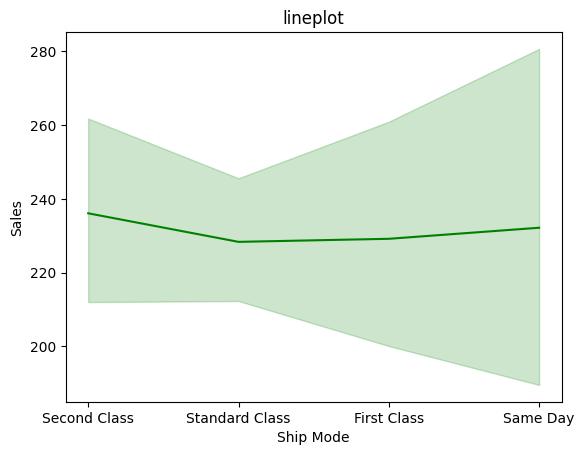

In [ ]:
from os import linesep
sns.lineplot(x="Ship Mode",y="Sales",data=sale,color="green")
plt.title("lineplot")

###- *Most sales are small—dots are packed near the bottom for all segments.*
###- *Home Office has the highest single sale, going above ₹20,000—an outlier compared to others.*
###- *Consumer and Corporate segments have similar patterns, with lots of low-value sales and a few medium ones.*
###- *Big sales are rare but possible in every segment—especially in Home Office.*


Text(0.5, 1.0, 'stripplot')

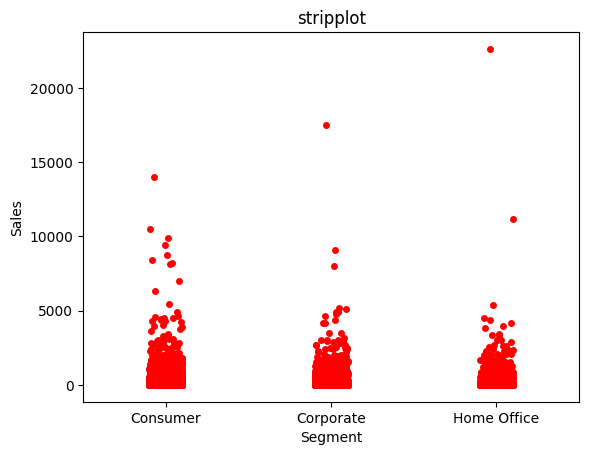

In [ ]:
sns.stripplot(x="Segment",y="Sales",data=sale,color="red")
plt.title("stripplot")

###- *All categories—Furniture, Office Supplies, and Technology—are present in every region, showing a wide market reach.*
###- *Color spread across regions means sales happened consistently from 2015 to 2018—no region was left out in any year.*
###- *Technology seems to have more data points in most regions, suggesting it might be a stronger or more active category.*
###- *East and West regions show slightly denser clusters, possibly indicating higher activity or sales volume there.*

<Axes: xlabel='Region', ylabel='Category'>

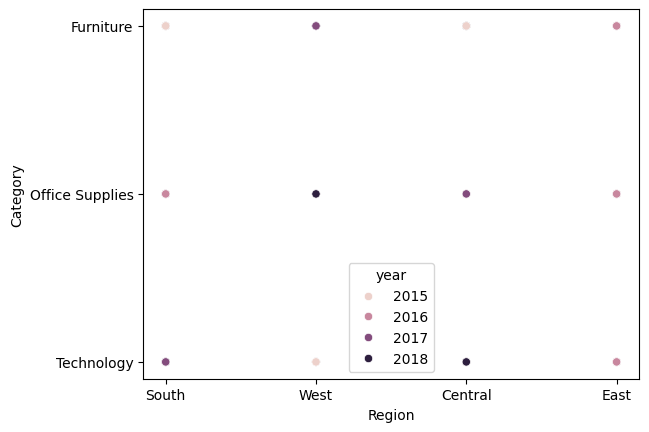

In [ ]:
sns.scatterplot(x="Region",y="Category",hue="year",data=sale)

###- *Office Supplies are the most frequent category in every region—especially in the West (1860 times).*
###- *Furniture is least frequent in the South (only 326), but highest in the West (691)*.
###- *Technology has moderate frequency overall, with the West again leading (589)*.
###- *West region dominates across all categories, showing the highest activity or demand*.


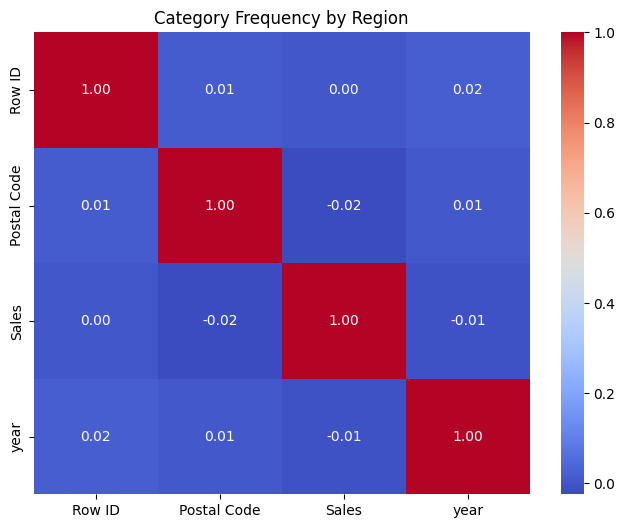

In [ ]:
# ct = pd.crosstab(sale['Region'], sale['Category'])
numeric=sale[['Row ID', 'Postal Code', 'Sales', 'year']]
corr_numeric=numeric.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_numeric, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Category Frequency by Region")
plt.show()